In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import save_npz, load_npz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle

<span>1.</span> Import category labels.

In [2]:
f = open("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\active_page_categories_ex_7.pkl", "rb")
active_page_categories_ex_7 = pickle.load(f)
f.close()
categories = []

for key in active_page_categories_ex_7:
    categories.append(active_page_categories_ex_7[key])

<span>2.</span> Import dissimilarity matrix and exptract upper triangle. 

In [3]:
mx_cos = np.loadtxt("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\active_users_ex_7_mx_cosine_dissimilarity.gz", delimiter=',')

In [4]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_cos.shape[0]):
    for j in range(i + 1, mx_cos.shape[0]):
        l.append(mx_cos[i,j])

One value is slightly negative, most likely for rounding issues. 

In [17]:
negative = 0
for i in range(len(l)):
    if l[i] <0:
        negative += 1
        print(l[i])

-2.22044604925e-14


Reaplcing the negative number with zero. 

In [16]:
l_2 = [x if x >= 0 else 0 for x in l]

<span>3. Run model for 7 clusters.</span>

- ward

In [18]:
Z = linkage(l_2, method="ward")

In [19]:
k=7
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

category,1,2,3,4,5,6,8
labels,,,,,,,
1,520,6,2,0,2,17,19
2,31,3,1,2,1,19,459
3,78,6,2,2,3,391,149
4,21,53,322,38,12,281,33
5,62,9,1,2,38,101,40
6,2,0,127,1,1,8,1
7,784,229,123,71,420,1275,143


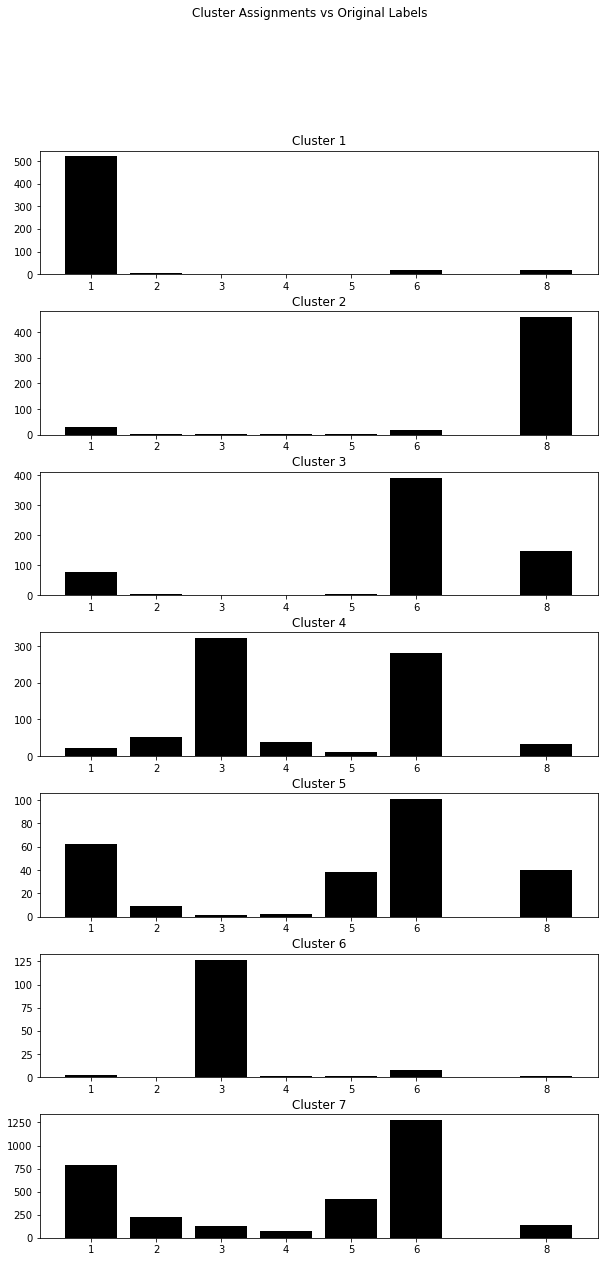

In [20]:
clusters = []

for i in range(0,7):
    clusters.append(ct.iloc[i].tolist())

fig, axes = plt.subplots(7, 1, figsize = (10,20))
fig.subplots_adjust(hspace = .3, wspace=.2)
fig.suptitle("Cluster Assignments vs Original Labels")
axes = axes.ravel()
for i in range(7):
    axes[i].bar([1,2,3,4,5,6,8], clusters[i], color = 'k')
    axes[i].set_title("Cluster " + str(i+1))
    axes[i].set_xticks([1,2,3,4,5,6,8])


In [21]:
ctt = ct.T
lbls = list(range(1,8)) # labels given by the clustering method
c = []                  # the most frequent original category within that label
f = []                  # the frequency on that category within that particular cluster

for i in range(1,8):
    m = max(ctt[i])
    pdind = pd.Index(ctt[i])
    freq = m / sum(ctt[i])
    loc = pdind.get_loc(m)
    if loc == 6:        # as the original category of 7 was dropped, category 8 follows category 6
        c.append(loc + 2)
    else:
        c.append(loc + 1)
    f.append(round(freq,3))

assignment = pd.DataFrame({"cluster label": lbls,
                          "most frequent original category within the cluster": c,
                          "its relative frequency": f})
assignment = assignment[["cluster label", 
                         "most frequent original category within the cluster",
                        "its relative frequency"]]
assignment

,cluster label,most frequent original category within the cluster,its relative frequency
0,1,1,0.919
1,2,8,0.890
2,3,6,0.620
3,4,3,0.424
4,5,6,0.399
5,6,3,0.907
6,7,6,0.419


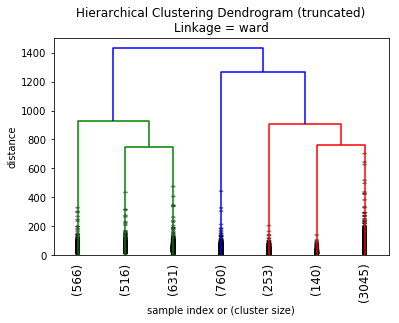

In [22]:
plt.title('Hierarchical Clustering Dendrogram (truncated)\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

---------------------------------

- complete

In [25]:
Z = linkage(l_2, method="complete")

In [26]:
k=7
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

category,1,2,3,4,5,6,8
labels,,,,,,,
1,1498,306,578,116,477,2092,844


Methods 'centroid', 'median', 'single', 'average' and 'weighted' don't result in meaningful cluster structures. 

In [35]:
Z = linkage(l_2, method="weighted")

In [36]:
k=7
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

category,1,2,3,4,5,6,8
labels,,,,,,,
1,1498,306,578,116,477,2092,844
